In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import ydata_profiling

In [9]:
# Importando o arquivo

df = pd.read_csv("C:/Users/karin/OneDrive/Área de Trabalho/data science/Aula 19 - Análise Bivariada-20240822T224819Z-001/Aula 19 - Análise Bivariada/supermarket_sales.csv")

In [10]:
#Head da df
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [11]:
# Vendo a Forma
df.shape

(1000, 17)

In [12]:
# Totalidade de registros por colunas

df.count()

Invoice ID                 1000
Branch                     1000
City                       1000
Customer type              1000
Gender                     1000
Product line               1000
Unit price                 1000
Quantity                   1000
Tax 5%                     1000
Total                      1000
Date                       1000
Time                       1000
Payment                    1000
cogs                       1000
gross margin percentage    1000
gross income               1000
Rating                     1000
dtype: int64

In [13]:
#Tipo de dato de cada columna

df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [14]:
#Principais medidas estatísticas

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,245.885335,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,234.176510,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,0.000000,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580,4.000000,5.500000,7.000000,8.500000,10.000000


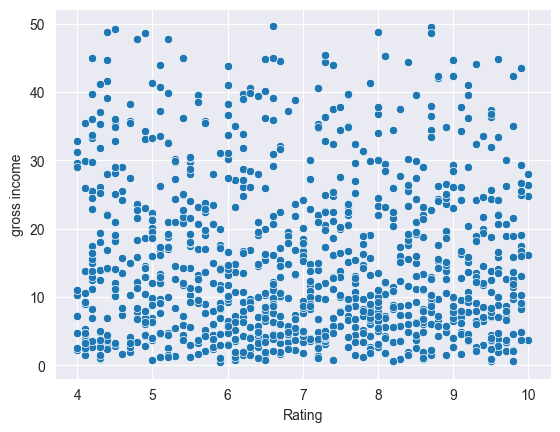

In [17]:
#Data Profiling
import seaborn as sns
import matplotlib.pyplot as plt

# Criando o gráfico scatterplot
sns.scatterplot(x='Rating', y='gross income', data=df)

# Exibindo o gráfico
plt.show()



### Resposta: Como você pode ver no gráfico de dispersão, não há relação entre a receita bruta de um cliente e sua classificação.

C:\Users\karin\OneDrive\Área de Trabalho\.venv\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Branch', ylabel='gross income'>

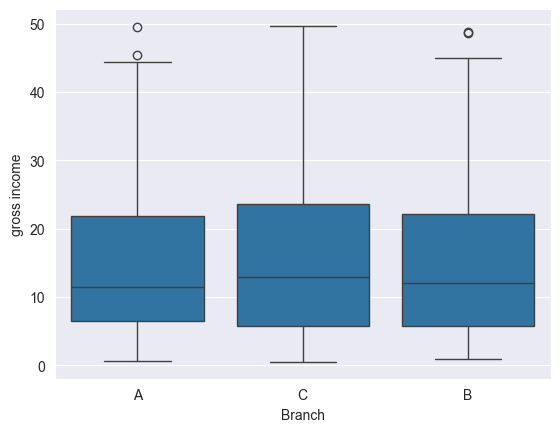

In [18]:
sns.boxplot(x=df['Branch'], y=df['gross income'])

### Resposta: Não há muita diferença na receita bruta por agência em nível médio. A Filial C tem receitas ligeiramente superiores às de A ou B. Conforme observado acima, embora a Filial A tenha vendas ligeiramente superiores às restantes, C, ou seja, Naypyitaw é a sucursal mais lucrativa em termos de receita bruta.

C:\Users\karin\OneDrive\Área de Trabalho\.venv\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Gender', ylabel='gross income'>

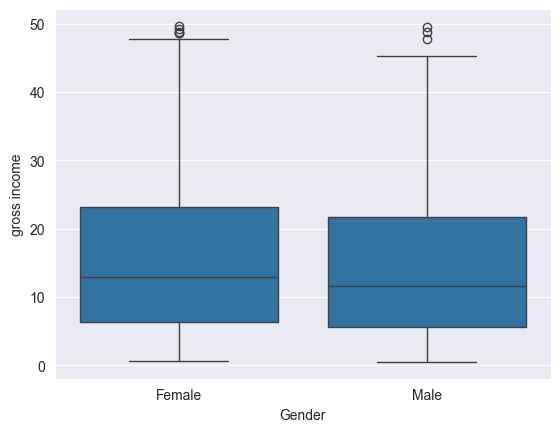

In [22]:
sns.boxplot(x=df['Gender'], y=df['gross income'])

### Resposta: O rendimento bruto é semelhante tanto para homens como para mulheres, embora as clientes do sexo feminino gastem um pouco mais no percentil 75.

<Axes: xlabel='Product line', ylabel='gross income'>

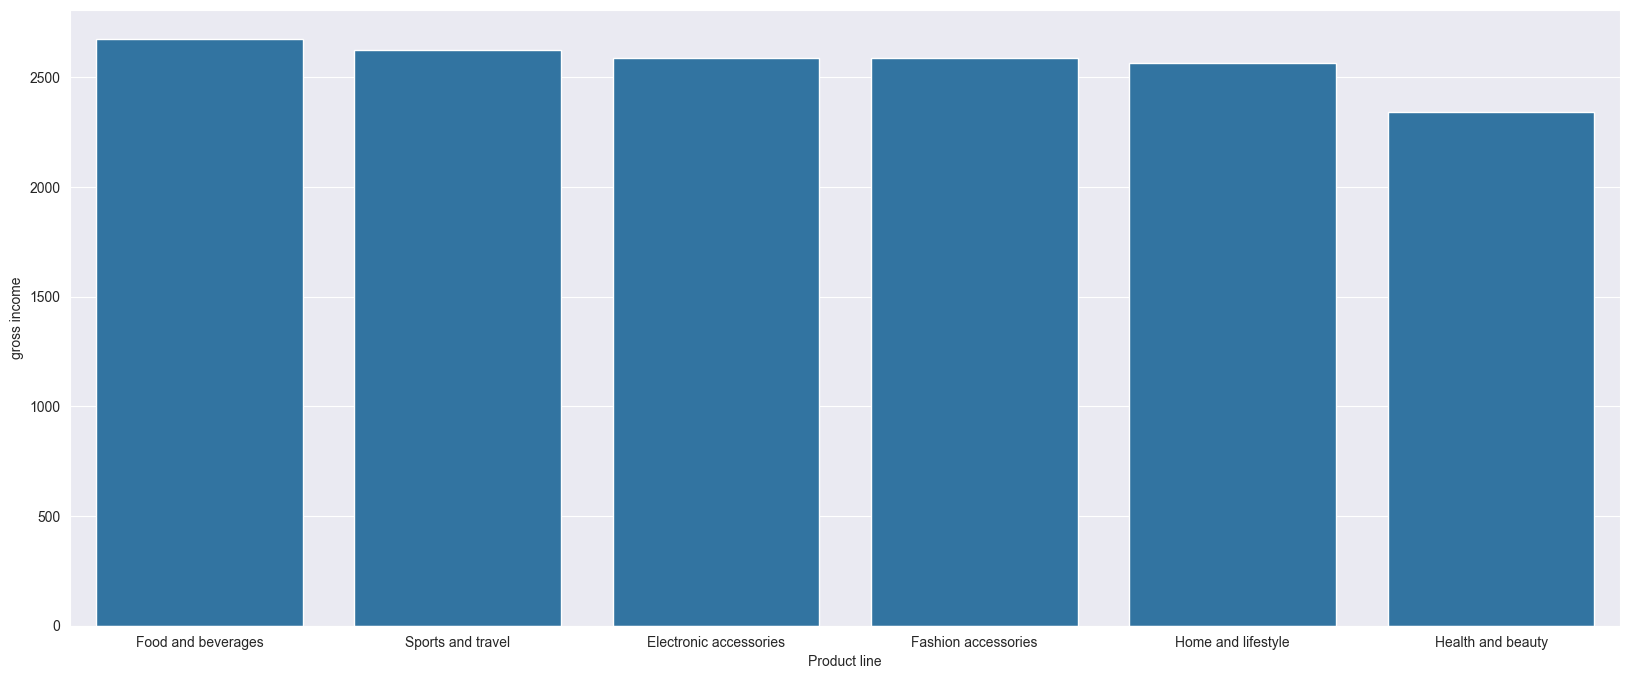

In [23]:
cat = df[["Product line", "gross income"]].groupby(['Product line'], as_index=False).sum().sort_values(by='gross income', ascending=False)

plt.figure(figsize=(20,8))

sns.barplot(x='Product line', y='gross income', data=cat)

### Resposta: A renda bruta é mais alta em comidas e bebidas.